<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Important-Scripts" data-toc-modified-id="Important-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Important Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Log-transform-large-values" data-toc-modified-id="Log-transform-large-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Log transform large values</a></span></li><li><span><a href="#Train-Test-split-after-log-transform" data-toc-modified-id="Train-Test-split-after-log-transform-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train-Test split after log transform</a></span></li><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scaling the Data</a></span></li><li><span><a href="#GBR-Modelling" data-toc-modified-id="GBR-Modelling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>GBR Modelling</a></span></li><li><span><a href="#GBR-modelling-using-pipeline" data-toc-modified-id="GBR-modelling-using-pipeline-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>GBR modelling using pipeline</a></span></li><li><span><a href="#Cross-Validation-Results" data-toc-modified-id="Cross-Validation-Results-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cross Validation Results</a></span></li><li><span><a href="#HPO-(Hyper-Parameters-Optimization)" data-toc-modified-id="HPO-(Hyper-Parameters-Optimization)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>HPO (Hyper Parameters Optimization)</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-for-Gradient-Boosting-Regressor" data-toc-modified-id="Grid-Search-for-Gradient-Boosting-Regressor-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Grid Search for Gradient Boosting Regressor</a></span></li></ul></li><li><span><a href="#Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor" data-toc-modified-id="Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Hyper Parameter using hyperopt-sklearn for Gradient Boosting Regressor</a></span></li><li><span><a href="#Scale-data-for-hyperparameter-tuning" data-toc-modified-id="Scale-data-for-hyperparameter-tuning-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Scale data for hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#HPO-without-scaling-the-data" data-toc-modified-id="HPO-without-scaling-the-data-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>HPO without scaling the data</a></span></li></ul></li></ul></div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Try to estimate the price based on given features.

![](https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/raw/data_description.png?raw=1)

## Model Introduction
The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms which impart additional boost to model’s accuracy. In this tutorial, we’ll learn about the two most commonly used algorithms i.e. Gradient Boosting (GBM) and XGboost.

Generally XGboost is considered more advanced than gbm. 
- xgboost supports regularization, however gbm does not.
- xgboost is blazingley faster than gbm.
- xgboost has built-in routine to handle missing values.
- xgboost has tree pruning mechanisms,however gbm and random forest are greedy algorithms and do not have tree pruning.
- In xgboost we can run cross-validation at each iteration of the boosting. But in gbm, we have to run grid search.

# Imports

In [0]:
import sys
ENV_BHISHAN = 'bhishan' in sys.modules

if ENV_BHISHAN:
    print('Environment: Personal environment')
    import src
    import bhishan
    %load_ext autoreload
    %autoreload 2

In [2]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    #!pip install hpsklearn
    !pip install shap

    # set OMP_NUM_THREADS=1 for hpsklearn package
    #!export OMP_NUM_THREADS=1
    print('Environment: Google Colab')

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376813 sha256=e12cf0626a865af5d69f63b0efd9572683ac8b5d628893be66b30448db0fe0d0
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap
Environment: Google Colab


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
SEED=100
np.random.seed(SEED) # we need this in each cell


# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
# pd.set_option('display.float_format', '{:,.4f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.4'), ('pandas', '0.25.3'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [4]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [5]:
import scipy
import sklearn

print([(x.__name__,x.__version__) for x in [scipy, sklearn]])

[('scipy', '1.3.2'), ('sklearn', '0.21.3')]


In [0]:
# scale and split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
# pipeline
from sklearn.pipeline import Pipeline

In [0]:
# classifier
import xgboost as xgb

In [0]:
# six and pickle
import six
import pickle
import joblib

In [0]:
# metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [0]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [0]:
df_eval = pd.DataFrame({'Model': [],
                        'Details':[],
                        'Train Neg MSE K-Fold Cross Validation':[],
                        'Test RMSE':[],
                        'Test Explained Variance Score':[],
                        'Test R-squared':[],
                        'Test Adjusted R-squared':[],
                        })

In [0]:
# model evaluation using snap
import shap
# shap_values = shap.TreeExplainer(model_xgb).shap_values(Xtest)
# shap.summary_plot(shap_values, Xtest)
# shap.dependence_plot("column_name", shap_values, Xtest)

# Important Scripts

In [0]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

In [0]:
def adjustedR2(rsquared,nrows,kcols):
    """
    Adjusted r-squared depends on number of rows and columns of Test data.

    It reduces the value of original r-squared value.
    """
    return rsquared- (kcols-1)/(nrows-kcols) * (1-rsquared)

# Load the data

In [16]:
# df_clean = pd.read_csv('../data/processed/data_cleaned_encoded.csv')
df_clean = pd.read_csv('https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/processed/data_cleaned_encoded.csv?raw=true')
print(df_clean.shape)
df_clean.head()

(21613, 92)


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  180000.0         2       1.00          770   
3  2487200875  2014-12-09  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  yr_sales  age  yr_renovated2  \
0           1340        5650      2014   59           1955   
1           1690        7639      2014   63           1991   
2           2720        8062      2015   82           1933   
3           1360        5000      2014   49           1965   
4           1800        7503      2015   28           1987   

   age_after_renovation zipcode_top10  zipcode_houses  basement_bool  \
0                    59        others             262              0   
1                    23        others             410              1   
2                    82        others             283              0   
3                    49        others             263              1   
4                    28        others             441              0   

   renovation_bool  age_cat  age_after_renovation_cat  waterfront_0  \
0                0        5                         5             1   
1                1        5                         2             1   
2                0        7                         7             1   
3                0        4                         4             1   
4                0        2                         2             1   

   waterfront_1  view_0  view_1  view_2  view_3  view_4  condition_1  \
0             0       1       0       0       0       0            0   
1             0       1       0       0       0       0            0   
2             0       1       0       0       0       0            0   
3             0       1       0       0       0       0            0   
4             0       1       0       0       0       0            0   

   condition_2  condition_3  condition_4  condition_5  grade_1  grade_10  \
0            0            1            0            0        0         0   
1            0            1            0            0        0         0   
2            0            1            0            0        0         0   
3            0            0            0            1        0         0   
4            0            1            0            0        0         0   

   grade_11  grade_12  grade_13  grade_3  grade_4  grade_5  grade_6  grade_7  \
0         0         0         0        0        0        0        0        1   
1         0         0         0        0        0        0        0        1   
2         0         0         0        0        0        0        1        0   
3         0         0         0        0        0        0        0        1   
4         0         0         0        0        0        0        0        0   

   grade_8  grade_9  zipcode_top10_98004  zipcode_top10_98006  \
0        0        0                    0         

In [17]:
# I will just take column names from this and will use cleaned data further.
# df_raw = pd.read_csv('../data/raw/kc_house_data.csv')
df_raw = pd.read_csv('https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/raw/kc_house_data.csv?raw=true',nrows=1)
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
features_raw_all = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df = df_clean[features_raw_all + ['price']]


dict_features = dict(enumerate(features_raw_all))
print(dict_features)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


# Log transform large values

In [19]:
log_cols = ['price','sqft_living','sqft_living15','sqft_lot','sqft_lot15']

for col in log_cols:
    df[col] = np.log1p(df[col].to_numpy())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


# Train-Test split after log transform

In [20]:
X = df[features_raw_all].to_numpy()

y = df['price'].to_numpy()

Xtrain_orig, Xtest, ytrain_orig, ytest = train_test_split (X,y,
                                                 test_size=0.20,
                                                 random_state=SEED)



df_Xtrain_orig = pd.DataFrame(Xtrain_orig, columns=features_raw_all)
df_Xtest = pd.DataFrame(Xtest, columns=features_raw_all)

Xtrain_orig.shape, ytrain_orig.shape, Xtest.shape, ytest.shape, Xtrain_orig[0][:2], Xtest[0][:2]

((17290, 18),
 (17290,),
 (4323, 18),
 (4323,),
 array([3.  , 1.75]),
 array([3. , 2.5]))

# Train-Validation Split

In [0]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain_orig, ytrain_orig,
                                                  random_state=SEED, test_size=0.2)

df_Xtrain = pd.DataFrame(Xtrain, columns=features_raw_all)
df_Xvalid = pd.DataFrame(Xvalid, columns=features_raw_all)

# Scaling the Data

In [22]:
scaler = StandardScaler() # standard scaler better for regression
scaler.fit(Xtrain_orig)

Xtrain_orig_scaled = scaler.transform(Xtrain_orig)
Xtest_scaled = scaler.transform(Xtest)

Xtrain_scaled = scaler.transform(Xtrain)
Xvalid_scaled = scaler.transform(Xvalid)


df_Xtrain_orig_scaled = pd.DataFrame(Xtrain_orig_scaled, columns=features_raw_all)
df_Xtrain_scaled = pd.DataFrame(Xtrain_scaled, columns=features_raw_all)
df_Xtest_scaled = pd.DataFrame(Xtest_scaled, columns=features_raw_all)
df_Xvalid_scaled = pd.DataFrame(Xvalid_scaled, columns=features_raw_all)

Xtrain_scaled[0][:2], Xtest_scaled[0][:2]

(array([1.74976973, 1.15630369]), array([-0.39032991,  0.50625765]))

# Modelling xgboost
https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters
```
Parameters:
-------------
max_depth=3
learning_rate=0.1
n_estimators=100 # number of trees you want to build.
verbosity=1 **NOTE: it print in ipython terminal not in browser
silent=None **deprecated use verbosity
objective='binary:logistic' **for binary classification
booster='gbtree' **use default tree not linear even for regression (may also use dart instead of gbtree, but needs to tune)
n_jobs=1 **make this -1
nthread=None **deprecated use n_jobs
gamma=0 # A higher value leads to fewer splits.
min_child_weight=1
max_delta_step=0
subsample=1 # percentage of samples used per tree. Low value can lead to underfitting.
colsample_bytree=1 # percentage of features used per tree. High value can lead to overfitting.
colsample_bylevel=1
colsample_bynode=1
reg_alpha=0 # A large value leads to more regularization.
reg_lambda=1 # L2 regularization on leaf weights and is smoother than L1 regularization.
scale_pos_weight=1
base_score=0.5
random_state=0 **use your own random state
seed=None      **deprecated use random_state
missing=None
```

[Early stopping](https://xgboost.readthedocs.io/en/latest/python/python_intro.html):  

If you have a validation set, you can use early stopping to find the optimal number of boosting rounds. Early stopping requires at least one set in evals. If there’s more than one, it will use the last.

`train(..., evals=evals, early_stopping_rounds=10)`


The model will train until the validation score stops improving. Validation error needs to decrease at least every early_stopping_rounds to continue training.

If early stopping occurs, the model will have three additional fields: `bst.best_score`, `bst.best_iteration` and `bst.best_ntree_limit`. Note that xgboost.train() will return a model from the last iteration, not the best one.

This works with both metrics to minimize (RMSE, log loss, etc.) and to maximize (MAP, NDCG, AUC). Note that if you specify more than one evaluation metric the last one in param['eval_metric'] is used for early stopping.

If early stopping is enabled during training, you can get predictions from the best iteration with bst.best_ntree_limit:

`ypred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)`



[Faster implementations](https://github.com/dmlc/xgboost/issues/1950)

Flexible tree growing policies
The existing tree grower in xgboost grows a tree in a depth-wise fashion, executing splits in first level before splits in second and so forth. The new grower lets you control the way new nodes are added to the tree:

grow_policy=depthwise (default): split at nodes closest to the root, i.e. grow depth-wise.
grow_policy=lossguide: split at nodes with highest loss change. This behavior mimics that of LightGBM.
It has been reported that the lossguide policy often results in faster convergence in loss, though there is also risk of over-fitting(see the preliminary results).


In [23]:
import xgboost as xgb

show_method_attributes(xgb)

Object Type: <class 'module'>



0                1                2     3                4  \
0        Booster         XGBModel     XGBRegressor  core          libpath   
1        DMatrix  XGBRFClassifier  absolute_import    cv  plot_importance   
2   VERSION_FILE   XGBRFRegressor         callback     f        plot_tree   
3  XGBClassifier        XGBRanker           compat                          

          5            6  
0  plotting  to_graphviz  
1     rabit        train  
2   sklearn     training  
3

In [24]:
show_method_attributes(xgb.plotting)

Object Type: <class 'module'>



0         1                2                3          4   5  \
0  Booster  XGBModel  absolute_import  plot_importance  plot_tree  re   
1  BytesIO                                                              

             6  
0  to_graphviz  
1

In [0]:
# help(xgb.XGBRegressor)

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# time
time_start = time.time()

# current parameters
Xtr = Xtrain_scaled
ytr = ytrain
Xtx = Xtest_scaled
ytx = ytest

# fit the model
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror')

model_xgb.fit(Xtr, ytr)

# fitted model
model = model_xgb


# save the model
# joblib.dump(model_xgb, 'model_xgb.pkl')
# model_xgb = joblib.load('model_xgb.pkl')


# ypreds
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)
ypreds = cross_val_predict(model, Xtx, ytx, cv=kf)

# train validation
cvs = cross_val_score(model, Xtr, ytr,cv=kf,
                      scoring = "neg_mean_squared_error")
score = cvs.mean()

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytx,ypreds))

# expalined variance
evs = explained_variance_score(ytx, ypreds)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

row_eval = ['Xgboost', 
            'default,log+standard scaling',
            score,rmse,evs,r2,ar2]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

# results
df_eval

Time taken: 0 min 6 secs


Model                       Details  \
0  Xgboost  default,log+standard scaling   

   Train Neg MSE K-Fold Cross Validation  Test RMSE  \
0                              -0.034744   0.189327   

   Test Explained Variance Score  Test R-squared  Test Adjusted R-squared  
0                       0.872143        0.872143                 0.871639

# Feature Importance
Note:  
`model.feature_importance` gives important features based on information type gain.

`xgb.plot_feature_importance(model)` gives important features based on weights.

In [27]:
show_method_attributes(model_xgb)

Object Type: <class 'xgboost.sklearn.XGBRegressor'>



0                     1                        2  \
0              apply      colsample_bytree  get_num_boosting_rounds   
1         base_score          evals_result               get_params   
2            booster  feature_importances_           get_xgb_params   
3              coef_                   fit          importance_type   
4  colsample_bylevel                 gamma               intercept_   
5   colsample_bynode           get_booster                   kwargs   

                  3             4                 5           6  
0     learning_rate  n_estimators         reg_alpha        seed  
1        load_model        n_jobs        reg_lambda  set_params  
2    max_delta_step       nthread        save_model      silent  
3         max_depth     objective  scale_pos_weight   subsample  
4  min_child_weight       predict             score   verbosity  
5           missing  random_state

In [28]:
# feature importance
df_imp = pd.DataFrame({'Feature': features_raw_all,
                       'Importance_gain': model_xgb.feature_importances_
                       }) 

df_imp.sort_values('Importance_gain').style.background_gradient()

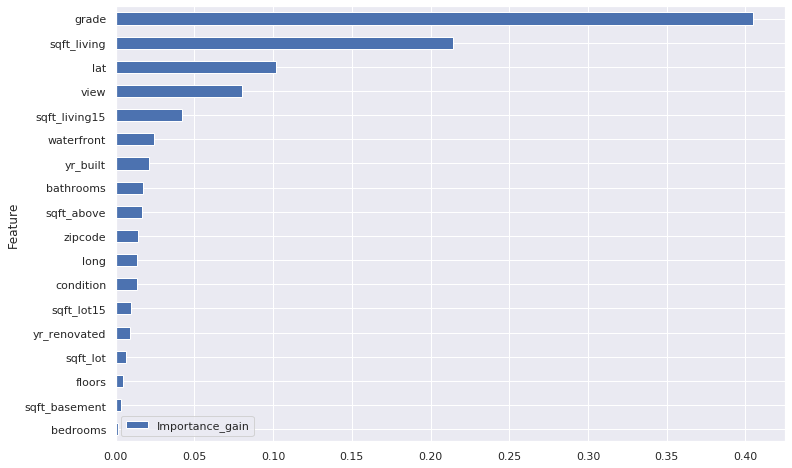

In [29]:
df_imp.sort_values('Importance_gain').set_index('Feature')\
.sort_values('Importance_gain').plot.barh(figsize=(12,8))

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


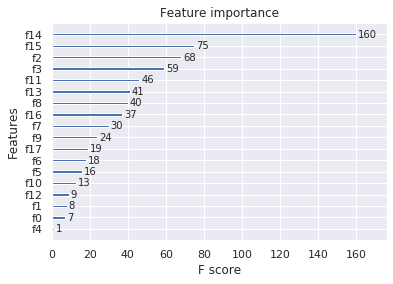

In [30]:
axsub = xgb.plot_importance(model_xgb)
print(features_raw_all)
print(dict_features)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


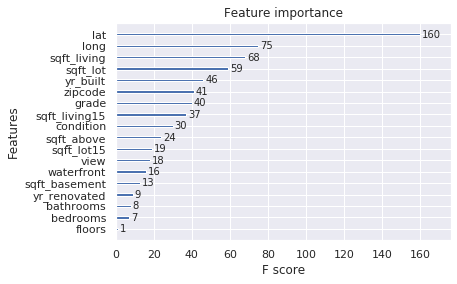

In [31]:
axsub = xgb.plot_importance(model_xgb)

Text_yticklabels = list(axsub.get_yticklabels())
dict_features = dict(enumerate(features_raw_all))
lst_yticklabels = [ Text_yticklabels[i].get_text().lstrip('f') for i in range(len(Text_yticklabels))]
lst_yticklabels = [ dict_features[int(i)] for i in lst_yticklabels]

axsub.set_yticklabels(lst_yticklabels)
print(dict_features)
plt.show()

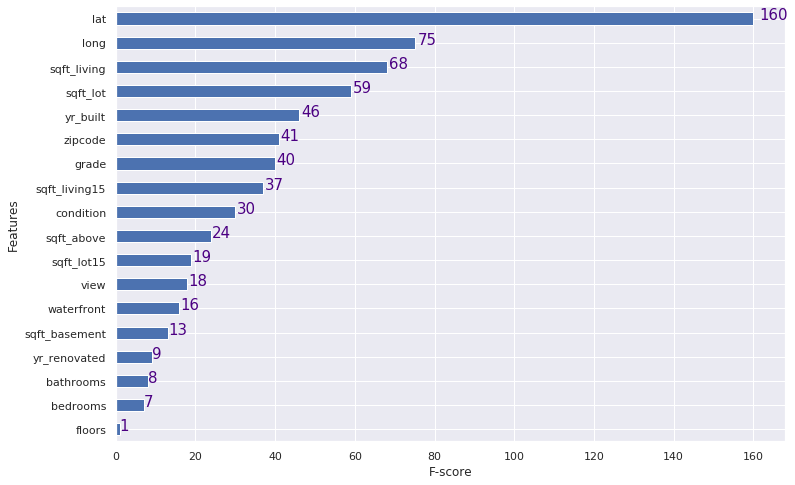

In [56]:
dict_fimp = model_xgb.get_booster().get_score(importance_type="weight")
# feature importance
df_imp = pd.DataFrame({'Features_given': list(dict_fimp.keys()),
                       'Importance_weight': list(dict_fimp.values())
                       }) 

df_imp['Features'] = df_imp['Features_given'].str.lstrip('f')
df_imp['Features'] = df_imp['Features'].astype(int).map(dict_features)

df_imp = df_imp.drop('Features_given',1).sort_values('Importance_weight')
df_imp = df_imp.set_index('Features').sort_values('Importance_weight')

ax = df_imp.plot.barh(figsize=(12,8))

plt.grid(True)
plt.xlabel('F-score')
ax.get_legend().remove()

for p in ax.patches:
    x = p.get_width()*1.01
    y = p.get_y()+ 0.2
    text = '{:.0f}'.format(p.get_width())
    ax.text(x, y,text,fontsize=15,color='indigo')

# Xgboost using DMatrix

In [0]:
# help(xgb.DMatrix)

In [0]:
dtrain = xgb.DMatrix(Xtrain_scaled,ytrain,
                     feature_names=features_raw_all)
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}


## Cross Validation

In [0]:
# help(xgb.cv)

In [0]:
num_boost_round=500
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)

cv_results = xgb.cv(params,dtrain, num_boost_round,
                    nfold=5,
                    early_stopping_rounds=50,
                    metrics="rmse",
                    folds=kf,
                    verbose_eval=50, # show progress at Nth iteration
                    seed=SEED)

cv_results.head()

[0]	train-rmse:11.3012+0.00111386	test-rmse:11.3011+0.00494709
[50]	train-rmse:0.218509+0.00257504	test-rmse:0.224574+0.00394489
[100]	train-rmse:0.177405+0.0017688	test-rmse:0.186848+0.00422414
[150]	train-rmse:0.168776+0.000942899	test-rmse:0.179667+0.00372749
[200]	train-rmse:0.164569+0.00103959	test-rmse:0.176487+0.00348556
[250]	train-rmse:0.161663+0.00083765	test-rmse:0.174435+0.00370292
[300]	train-rmse:0.159907+0.0009702	test-rmse:0.173279+0.00366904
[350]	train-rmse:0.158669+0.00100336	test-rmse:0.172519+0.0036869
[400]	train-rmse:0.157591+0.000976035	test-rmse:0.171764+0.00368009
[450]	train-rmse:0.157002+0.0011524	test-rmse:0.171414+0.00361545
[499]	train-rmse:0.156709+0.00130382	test-rmse:0.171253+0.00355961


train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        11.301155        0.001114       11.301146       0.004947
1        10.173134        0.001035       10.172805       0.004927
2         9.157934        0.001002        9.157534       0.004831
3         8.244391        0.000917        8.244470       0.005018
4         7.422368        0.000929        7.422397       0.004981

## Modelling xgboost using dtrain

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# time
time_start = time.time()

# current parameters
Xtr = Xtrain_scaled
ytr = ytrain
Xtx = Xtest_scaled
ytx = ytest

# get boosting data
dtrain = xgb.DMatrix(Xtr,ytr,feature_names=features_raw_all)
dtest = xgb.DMatrix(Xtx,feature_names=features_raw_all)

# boosting params
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10,
          'tree_method': 'hist',
          'grow_policy': 'depthwise', # depthwise, lossguide
          
          }

# train the model
num_boost_round= 10  # eg. take 1000
bst = xgb.train(params,dtrain,num_boost_round) # this is a booster object


# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

bst

Time taken: 0 min 0 secs


In [0]:
show_method_attributes(bst) # boosting object

Object Type: <class 'xgboost.core.Booster'>



0           1              2                          3  \
0              attr       boost           eval                   get_dump   
1        attributes     booster       eval_set                 get_fscore   
2    best_iteration        copy  feature_names                  get_score   
3  best_ntree_limit  dump_model  feature_types  get_split_value_histogram   

                       4                      5                   6  
0                 handle             save_model           set_param  
1             load_model  save_rabit_checkpoint  trees_to_dataframe  
2  load_rabit_checkpoint               save_raw              update  
3                predict               set_attr

In [0]:
show_method_attributes(model_xgb) # scikit learn style regressor model

Object Type: <class 'xgboost.sklearn.XGBRegressor'>



0                     1                        2  \
0              apply      colsample_bytree  get_num_boosting_rounds   
1         base_score          evals_result               get_params   
2            booster  feature_importances_           get_xgb_params   
3              coef_                   fit          importance_type   
4  colsample_bylevel                 gamma               intercept_   
5   colsample_bynode           get_booster                   kwargs   

                  3             4                 5           6  
0     learning_rate  n_estimators         reg_alpha        seed  
1        load_model        n_jobs        reg_lambda  set_params  
2    max_delta_step       nthread        save_model      silent  
3         max_depth     objective  scale_pos_weight   subsample  
4  min_child_weight       predict             score   verbosity  
5           missing  random_state

In [0]:
bst.best_iteration, bst.get_score(), bst.get_fscore()

(9,
 {'bathrooms': 1,
  'grade': 4,
  'lat': 2,
  'sqft_above': 1,
  'sqft_living': 3,
  'sqft_living15': 3,
  'view': 1},
 {'bathrooms': 1,
  'grade': 4,
  'lat': 2,
  'sqft_above': 1,
  'sqft_living': 3,
  'sqft_living15': 3,
  'view': 1})

In [0]:
# help(xgb.train)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

# time
time_start = time.time()

# current parameters
Xtr = Xtrain_scaled
ytr = ytrain
Xtx = Xtest_scaled
ytx = ytest
Xtv = Xvalid_scaled
ytv = yvalid

# get boosting data
dtrain = xgb.DMatrix(Xtr,ytr,feature_names=features_raw_all)
dtest = xgb.DMatrix(Xtx,ytx,feature_names=features_raw_all)
dvalid = xgb.DMatrix(Xtv,ytv,feature_names=features_raw_all)

# boosting params
params = {"objective":"reg:squarederror",
          'colsample_bytree': 0.3,
          'learning_rate': 0.1,
          'max_depth': 5,
          'alpha': 10}

# watch list
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# train the model
num_boost_round= 100  # eg. take 1000
bst = xgb.train(params,dtrain,num_boost_round,
                evals=watchlist,
                verbose_eval=10
                )

# save the model
# joblib.dump(bst, 'bst_xgb.pkl')
# bst = joblib.load('bst_xgb.pkl')


# ypreds
ypreds = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

# train validation
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)

cv_results = xgb.cv(params,dtrain, num_boost_round,
                    nfold=5,
                    early_stopping_rounds=50,
                    metrics="rmse", # gives train-rmse, test-rmse mean and std
                    folds=kf,
                    verbose_eval=50, # show progress at Nth iteration
                    seed=SEED)
score = cv_results['train-rmse-mean'].mean()

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytx,ypreds))

# expalined variance
evs = explained_variance_score(ytx, ypreds)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

row_eval = ['Xgboost', 
            'default,log+standard scaling,using dtrain and dtest',
            score,rmse,evs,r2,ar2]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

# results
df_eval

[0]	train-rmse:11.301	valid-rmse:11.3165
[10]	train-rmse:3.9562	valid-rmse:3.96742
[20]	train-rmse:1.40855	valid-rmse:1.4156
[30]	train-rmse:0.545747	valid-rmse:0.550361
[40]	train-rmse:0.282421	valid-rmse:0.287185
[50]	train-rmse:0.216563	valid-rmse:0.222112
[60]	train-rmse:0.200276	valid-rmse:0.206113
[70]	train-rmse:0.189321	valid-rmse:0.195738
[80]	train-rmse:0.18348	valid-rmse:0.189942
[90]	train-rmse:0.180283	valid-rmse:0.187057
[99]	train-rmse:0.177193	valid-rmse:0.184232
[0]	train-rmse:11.3012+0.00111386	test-rmse:11.3011+0.00494709
[50]	train-rmse:0.218509+0.00257504	test-rmse:0.224574+0.00394489
[99]	train-rmse:0.177693+0.00175361	test-rmse:0.187118+0.00430543
Time taken: 0 min 5 secs


Model                                              Details  \
0  Xgboost                         default,log+standard scaling   
1  Xgboost  default,log+standard scaling,using dtrain and dtest   

   Train Neg MSE K-Fold Cross Validation  Test RMSE  \
0                              -0.034744   0.189327   
1                               1.251390   0.181842   

   Test Explained Variance Score  Test R-squared  Test Adjusted R-squared  
0                       0.872143        0.872143                 0.871639  
1                       0.882226        0.882053                 0.881587

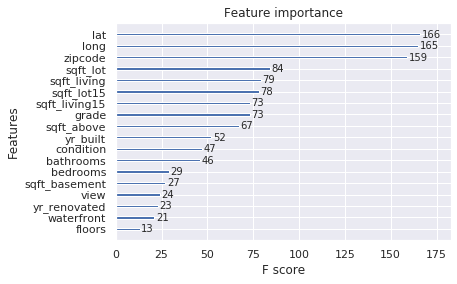

In [0]:
xgb.plot_importance(bst)

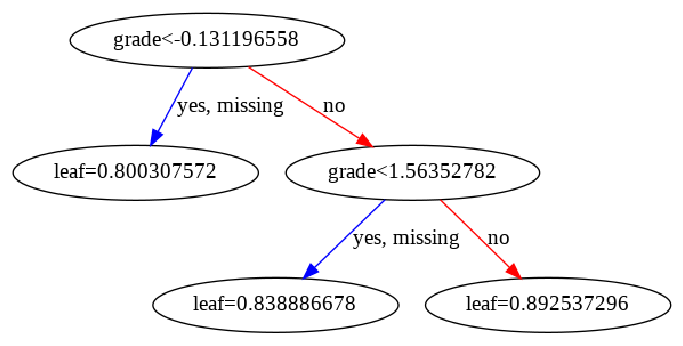

In [0]:
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_tree(bst,ax=ax,num_trees=4)

# Model Evaluation Using shap
- [official shap github repo](https://github.com/slundberg/shap)

In [0]:
import shap

In [0]:
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(Xtest_scaled)

In [0]:
# load JS visualization code to notebook
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:],
                df_Xtest_scaled.iloc[0,:],
                matplotlib=False,
                text_rotation=90)

In [0]:
# load JS visualization code to notebook
shap.initjs()

# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, df_Xtest_scaled,matplotlib=False)

/usr/local/lib/python3.6/dist-packages/shap/plots/force.py:145: UserWarning: shap.force_plot is slow for many thousands of rows, try subsampling your data.
  warnings.warn("shap.force_plot is slow for many thousands of rows, try subsampling your data.")


In [0]:
Xtest_scaled.shape, shap_values.shape

((4323, 18), (4323, 18))

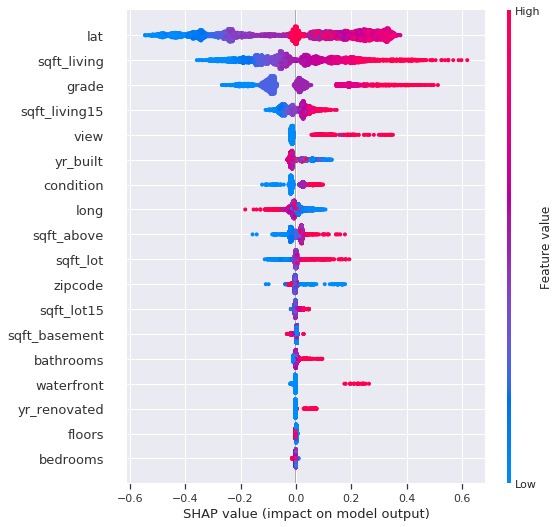

In [0]:
shap.summary_plot(shap_values, df_Xtest_scaled)

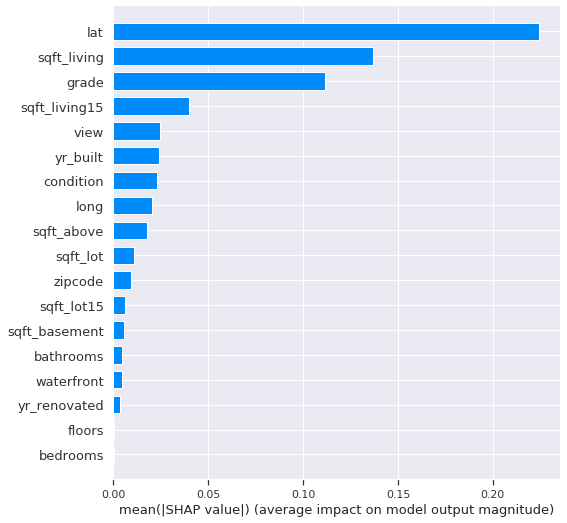

In [0]:
shap.summary_plot(shap_values, df_Xtest_scaled, plot_type='bar')

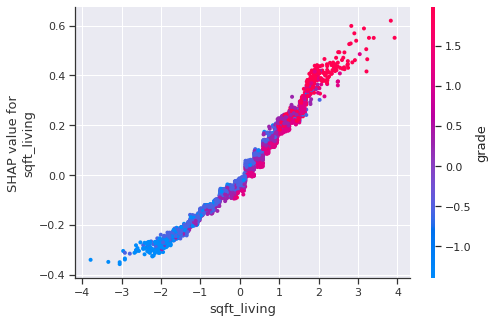

In [0]:
shap.dependence_plot("sqft_living", shap_values, df_Xtest_scaled)

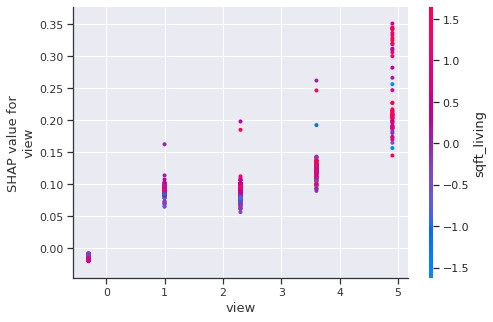

In [0]:
shap.dependence_plot("view", shap_values, df_Xtest_scaled)

# HPO (Hyper Parameter Optimization)

We generally should optimize model complexity and then tune the convergence.

model complexity: n_estimators, max_depth etc  
convergence: learning rate  

Parameters:
- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.

Regularization parameters:

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [0]:
# Baseline model

In [0]:
time_start = time.time()
# model fit
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror')

model_xgb.fit(df_Xtrain_scaled, ytrain)
default = """
ar2 = 0.8768138697750008
"""

# model_xgb.fit(df_Xtrain_scaled,ytrain,
#             eval_set=[(df_Xvalid_scaled,yvalid)],
#             eval_metric='rmse', # auc for classification
#             early_stopping_rounds=10, # early stopping gives
#             verbose = 50,
          
#             )
# early30 = """
# ar2 = 0.8768138697750008

# """


# predictions
ypreds = model_xgb.predict(df_Xtest_scaled)


# r-squared values
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
print(ar2)

0.8768138697750008


# HPO Model Complexity

In [0]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
n = 1200
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror',
                        n_estimators=n,
                        )

model_xgb.fit(df_Xtrain_scaled, ytrain)
ypreds = model_xgb.predict(df_Xtest_scaled)
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
print(n, round(ar2,4))

results = \
"""
1100 0.9084
1200 0.9088
1300 0.9086
1400 0.9087
1500 0.9086
1600 0.9087
1700 0.9086
1800 0.9084
1900 0.9082
2000 0.9081


1160 0.9087
1170 0.9087
1180 0.9087
1190 0.9088
1200 0.9088
1210 0.9087
1220 0.9087

"""

1200 0.9088


In [0]:
for n in np.arange(3,4):
  model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=n,
                          )

  model_xgb.fit(df_Xtrain_scaled, ytrain)
  ypreds = model_xgb.predict(df_Xtest_scaled)
  r2 = sklearn.metrics.r2_score(ytest, ypreds)
  ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
  print(n, round(ar2,4))

"""
1 0.8744
2 0.9031
3 0.9088
4 0.9078
5 0.9058
6 0.9045
7 0.9032
""";

3 0.9088


In [0]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
for n in [1]:
  model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=n,
                          )

  model_xgb.fit(df_Xtrain_scaled, ytrain)
  ypreds = model_xgb.predict(df_Xtest_scaled)
  r2 = sklearn.metrics.r2_score(ytest, ypreds)
  ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
  print(n, round(ar2,4))

"""
for n in np.geomspace(0.001,1,10)
0.0001 0.9083
0.0002782559402207126 0.9083
0.000774263682681127 0.9081
0.002154434690031882 0.9093
0.005994842503189409 0.9082
0.016681005372000592 0.9084
0.046415888336127774 0.908
0.12915496650148828 0.9093
0.3593813663804626 0.9095
1.0 0.9104

""";

0.0001 0.9083
0.0002782559402207126 0.9083
0.000774263682681127 0.9081
0.002154434690031882 0.9093
0.005994842503189409 0.9082
0.016681005372000592 0.9084
0.046415888336127774 0.908
0.12915496650148828 0.9093
0.3593813663804626 0.9095
1.0 0.9104


In [0]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=1.0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
for n in np.arange(1,20):
  model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=n,
                          )

  model_xgb.fit(df_Xtrain_scaled, ytrain)
  ypreds = model_xgb.predict(df_Xtest_scaled)
  r2 = sklearn.metrics.r2_score(ytest, ypreds)
  ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
  print( round(n,4), round(ar2,4))

"""
np.geomspace(1,1000,10)
1.0 0.9104
2.1544 0.9098
4.6416 0.9101
10.0 0.9097
21.5443 0.9101
46.4159 0.909
100.0 0.9082
215.4435 0.9076
464.1589 0.9042
1000.0 0.9004

np.arange(1,20)
1 0.9104
2 0.9104
3 0.9098
4 0.9101
5 0.9111 ** best
6 0.9111
7 0.9097
8 0.9099
9 0.9099
10 0.9097
11 0.9105
12 0.9105
13 0.9101
14 0.9099
15 0.9093
16 0.9111
17 0.9103
18 0.9101
19 0.9101

""";

1 0.9104
2 0.9104
3 0.9098
4 0.9101
5 0.9111
6 0.9111
7 0.9097
8 0.9099
9 0.9099
10 0.9097
11 0.9105
12 0.9105
13 0.9101
14 0.9099
15 0.9093
16 0.9111
17 0.9103
18 0.9101
19 0.9101


In [0]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=1, reg_lambda=19, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
for n in [1]:
  model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=n
                          )

  model_xgb.fit(df_Xtrain_scaled, ytrain)
  ypreds = model_xgb.predict(df_Xtest_scaled)
  r2 = sklearn.metrics.r2_score(ytest, ypreds)
  ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
  print( round(n,4), round(ar2,4))


"""
np.geomspace(0.001,1,10)
0.001 0.8226
0.0022 0.8463
0.0046 0.8657
0.01 0.8738
0.0215 0.8885
0.0464 0.8963
0.1 0.9017
0.2154 0.904
0.4642 0.9085
1.0 0.9111

np.arange(0.8,1.0,0.02)
0.8 0.9093
0.82 0.911
0.84 0.9104
0.86 0.9096
0.88 0.9095
0.9 0.9103
0.92 0.91
0.94 0.9102
0.96 0.9097
0.98 0.9104

np.arange(0.98,1.0,0.001)
0.98 0.9104
0.981 0.9099
0.982 0.9102
0.983 0.9101
0.984 0.91
0.985 0.9099
0.986 0.9105
0.987 0.9098
0.988 0.9103
0.989 0.9107
0.99 0.9095
0.991 0.9101
0.992 0.9109
0.993 0.9101
0.994 0.9103
0.995 0.9105
0.996 0.9103
0.997 0.9103
0.998 0.9107
0.999 0.9104
1.0 0.9111
""";

1 0.9111


In [0]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=1, reg_lambda=5, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
for n in [0]:
  model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=1,
                          gamma=n
                          )

  model_xgb.fit(df_Xtrain_scaled, ytrain)
  ypreds = model_xgb.predict(df_Xtest_scaled)
  r2 = sklearn.metrics.r2_score(ytest, ypreds)
  ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
  print( round(n,4), round(ar2,4))

"""
0.0 0.9111
0.1111 0.8972
0.2222 0.8903
0.3333 0.8871
0.4444 0.8829
0.5556 0.8804
0.6667 0.8787
0.7778 0.8775
0.8889 0.8758
1.0 0.8728
""";

0 0.9111


In [0]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=1, reg_lambda=5, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
for n in [1]:
  model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=1,
                          gamma=0,
                          min_child_weight=n,
                          )

  model_xgb.fit(df_Xtrain_scaled, ytrain)
  ypreds = model_xgb.predict(df_Xtest_scaled)
  r2 = sklearn.metrics.r2_score(ytest, ypreds)
  ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
  print( round(n,4), round(ar2,4))

"""
0.0 0.9111
0.1111 0.9111
0.2222 0.9111
0.3333 0.9111
0.4444 0.9111
0.5556 0.9111
0.6667 0.9111
0.7778 0.9111
0.8889 0.9111
1.0 0.9111

""";

1 0.9111


In [0]:
model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=100, reg_alpha=1, reg_lambda=5, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
for n in [1]:
  model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=1,
                          gamma=0,
                          min_child_weight=1,
                          colsample_bytree=n

                          )

  model_xgb.fit(df_Xtrain_scaled, ytrain)
  ypreds = model_xgb.predict(df_Xtest_scaled)
  r2 = sklearn.metrics.r2_score(ytest, ypreds)
  ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
  print( round(n,4), round(ar2,4))

"""
0.0 0.8875
0.1111 0.9021
0.2222 0.9087
0.3333 0.9105
0.4444 0.9107
0.5556 0.9111
0.6667 0.9107
0.7778 0.9097
0.8889 0.9101
1.0 0.9111


0.9 0.9101
0.9111 0.9101
0.9222 0.9101
0.9333 0.9101
0.9444 0.9107
0.9556 0.9107
0.9667 0.9107
0.9778 0.9107
0.9889 0.9107
1.0 0.9111
""";

1 0.9111


In [0]:
for n in [0.1]:
  model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                          objective='reg:squarederror',
                          n_estimators=1200,
                          max_depth=3,
                          reg_alpha=1,
                          reg_lambda=5,
                          subsample=1,
                          gamma=0,
                          min_child_weight=1,
                          colsample_bytree=1,
                          learning_rate=n

                          )

  model_xgb.fit(df_Xtrain_scaled, ytrain)
  ypreds = model_xgb.predict(df_Xtest_scaled)
  r2 = sklearn.metrics.r2_score(ytest, ypreds)
  ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
  print( round(n,4), round(ar2,4))

"""
0.0001 -442.5797
0.001 -50.6359
0.1 0.9111
0.2 0.9086
0.3 0.9072
0.4 0.9036
""";

0.1 0.9111


In [0]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV

# params_grid = {
#    'colsample_bytree':[0.4,0.6,0.8],
#    'gamma':[0,0.03,0.1,0.3],
#    'min_child_weight':[1.5,6,10],
#    'learning_rate':[0.1,0.07],
#    'max_depth':[3,5],
#    'n_estimators':[10000],
#    'reg_alpha':[1e-5, 1e-2,  0.75],
#    'reg_lambda':[1e-5, 1e-2, 0.45],
#    'subsample':[0.6,0.95]  
# }

                    
# model_xgb = xgb.XGBRegressor(learning_rate =0.1,
#                                  n_estimators=1000,
#                                  max_depth=5,
#                                  min_child_weight=1,
#                                  gamma=0,
#                                  subsample=0.8,
#                                  colsample_bytree=0.8,
#                                  n_jobs=-1,
#                                  scale_pos_weight=1,
#                                  seed=RANDOM_STATE)

# gsearch1 = GridSearchCV(estimator=model_xgb,
#                         param_grid=params_grid, 
#                         n_jobs=-1,
#                         iid=False, 
#                         verbose=10,
#                         scoring='neg_mean_squared_error')

# gsearch1.fit(Xtrain_scaled,ytrain)
# print (gsearch1.grid_scores_)
# print('best params')
# print (gsearch1.best_params_)
# print('best score')
# print (gsearch1.best_score_)

# Best Model

In [0]:
model_xgb = xgb.XGBRegressor(n_jobs=-1, random_state=SEED,
                        objective='reg:squarederror',
                        n_estimators=1200,
                        max_depth=3,
                        reg_alpha=1,
                        reg_lambda=5,
                        subsample=1,
                        gamma=0,
                        min_child_weight=1,
                        colsample_bytree=1,
                        learning_rate=0.1

                        )

model_xgb.fit(df_Xtrain_scaled, ytrain)
ypreds = model_xgb.predict(df_Xtest_scaled)
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, df_Xtrain_scaled.shape[0], df_Xtrain_scaled.shape[1])
print(round(ar2,4))

0.9111


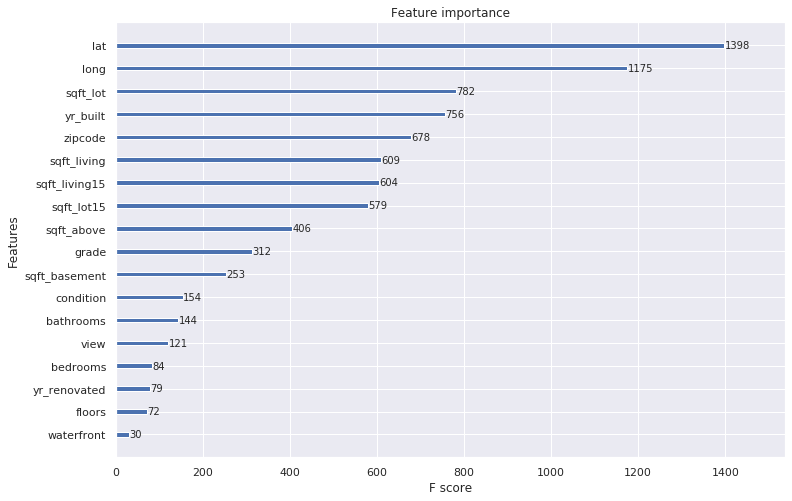

In [0]:
# feature importance
fig,ax = plt.subplots(figsize=(12,8))
xgb.plot_importance(model_xgb,ax=ax)
plt.show()